# Contravariant cylindrical vector transformed to cartesian

We will in this notebook transfor a contravariant cylindrical vector to cartesian coordinates.

A contravariant vector transforms as
$$
(A')^i=\frac{\partial(x')^i}{\partial x^j}A^j
$$
where the prime $'$ refers to quantities with in the new coordinate system.

In [7]:
from collections import OrderedDict
from sympy import init_printing
from sympy import symbols, simplify, solve
from sympy import Eq
from sympy import exp, sqrt, atan, cos, sin
import re
from IPython.display import display

init_printing()

In [8]:
rho = symbols('rho', positive = True)
theta, z = symbols('theta, z', real = True)
x, y, z = symbols('x, y, z', real = True)
Arho, Atheta, Az = symbols('A^rho, A^theta, A^z', real = True)
cylSymb = [rho, theta, z]
ASymb = [Arho, Atheta, Az]

The transform

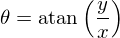

In [9]:
cylToCart = OrderedDict([(rho,sqrt(x**2+y**2)),
                         (theta, atan(y/x)),
                         (z, 1*z)])

for coord in cylToCart.keys():
    display(Eq(coord,cylToCart[coord]))

The inverse transform

In [10]:
cartToCyl = OrderedDict([(x, rho*cos(theta)),
                         (y, rho*sin(theta)),
                         (z, z)])

for coord in cartToCyl.keys():
    display(Eq(coord,cartToCyl[coord]))

Contravariant components written in cylindrical coordinates

In [11]:
cartTemplateCyl = OrderedDict.fromkeys(cartToCyl)
for coord in cartTemplateCyl.keys():
    cartTemplateCyl[coord]  = 0
    for cart, A in zip(cylSymb, ASymb):
        cartTemplateCyl[coord]  += A*cartToCyl[coord].diff(cart)
    display(Eq(symbols('v^'+str(coord)),cartTemplateCyl[coord]))

Contravariant components written in cartesian coordinates

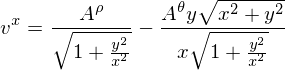

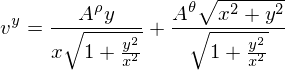

In [12]:
cartTemplateCart = cartTemplateCyl.copy()
replace = [(coord, cylToCart[coord]) for coord in cylToCart.keys()]
for coord in cartTemplateCart.keys():
    cartTemplateCart[coord] = cartTemplateCart[coord].subs(replace)
    display(Eq(symbols('v^'+str(coord)),cartTemplateCart[coord]))